# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm

In [4]:
#Abrir o arquivo
df = pd.read_csv('earthquake(1).csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [5]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [6]:
criterio= []
for i in range(len(df.Latitude)):
    if df.Latitude[i] < 0:
        criterio.append('Sul')
    else:
        criterio.append('norte')
        
df['Hemisferio'] = pd.Series(criterio)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisferio
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

DENSIDADE
(5.496, 5.68]    0.370280
(5.68, 5.86]     0.232274
(5.86, 6.04]     0.150863
(6.04, 6.22]     0.090765
(6.22, 6.4]      0.057321
(6.4, 6.58]      0.019990
(6.58, 6.76]     0.028917
(6.76, 6.94]     0.018068
(6.94, 7.12]     0.012430
(7.12, 7.3]      0.007048
(7.3, 7.48]      0.002520
(7.48, 7.66]     0.003930
(7.66, 7.84]     0.002990
(7.84, 8.02]     0.001452
(8.02, 8.2]      0.000598
(8.2, 8.38]      0.000214
(8.38, 8.56]     0.000085
(8.56, 8.74]     0.000128
(8.74, 8.92]     0.000043
(8.92, 9.1]      0.000085
Name: Magnitude, dtype: float64


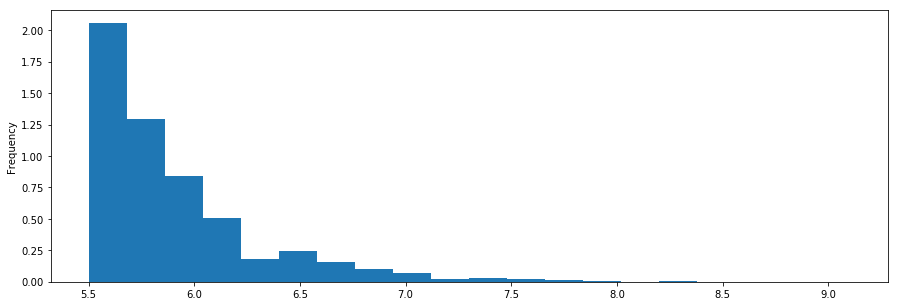

In [7]:
df.Magnitude.value_counts()

dfmag = pd.cut(df.Magnitude, bins=20)
print('DENSIDADE')
print(dfmag.value_counts(sort=False, normalize=True))
plot = df.Magnitude.plot.hist(bins=20, normed = True, figsize = (15,5))

Como Magnitude é uma variável contínua, o melhor tipo de gráfico para interpretar essa variavel é o histograma, o qual divide os dados em 'bins' (no caso em 20 bins iguais), desse modo é possivel observar as faixas de magnitudes que se repetem com maior frequencia

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [8]:
a, b = expon.fit(df.Magnitude)
print(a)
print(b)

5.49999999967
0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

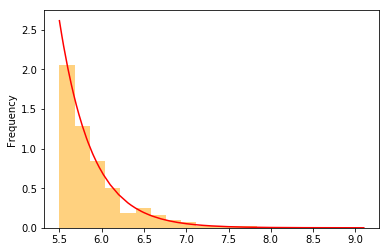

In [9]:
plt.plot(sorted(df.Magnitude), expon.pdf(sorted(df.Magnitude), loc = a, scale = b), color = 'red')
plot = df.Magnitude.plot.hist(bins=20, normed = True, color = 'orange', alpha = 0.5)

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [10]:
ct = pd.crosstab(df['Hemisferio'], df.Type, normalize = True)
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Sul,0.545148,0.000085,0.001196,0.000043
norte,0.447164,0.000085,0.006279,0.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [11]:
prob = ct.iloc[1,0]*100

print('a probabilidade de ocorrer um terremoto no hemisferio norte é de {0}%'.format(prob))

a probabilidade de ocorrer um terremoto no hemisferio norte é de 44.71638475995216%


Explique o seu raciocínio

Como ja possuimos um crosstab normalizado entre as variveis Type e Hemisferio, basta localizarmos na linha 'Norte' a coluna 'Earthquake' para descobrir a probabilidade

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [12]:
soma = []
for i in range(4):
    soma.append(ct.iloc[1,i])
totalnorte = np.sum(soma)
probNE_N = ct.iloc[1,2]/totalnorte
probNE_N

print('P(Nuclear Explosion|Norte)= {0}'.format(probNE_N))

P(Nuclear Explosion|Norte)= 0.013844415144094933


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

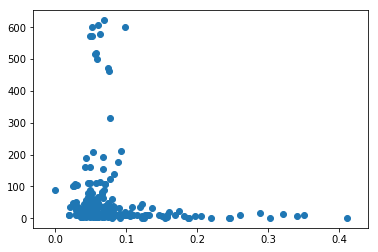

In [13]:
scatter = plt.scatter(df['Magnitude Error'], df.Depth)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [14]:
corr = df['Magnitude Error'].corr(df['Depth'])
print("A correlação entre Magnitude Error e Depth é de :{0}".format(corr))

A correlação entre Magnitude Error e Depth é de :-0.0769184389233872


Explique o que significa o valor da correlação calculada acima? 

A correlação é um numero que varia de -1 à 1, indicado o quanto uma variável depende da outra, no exemplo do scatter entre Magnitude Error e Depth, vemos quase nenhuma relação entre as variaveis, por isso a correlação se aproxima de zero

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


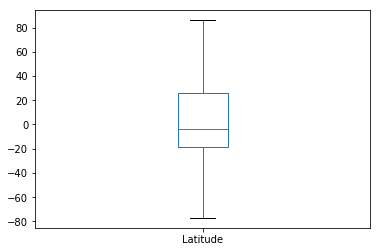

In [15]:
#plot = df.Latitude.plot(kind = 'box')
#plt.show()
#plot = df.Longitude.plot(kind = 'box')
print(df.Latitude.describe())
plot = df.Latitude.plot(kind = 'box')

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


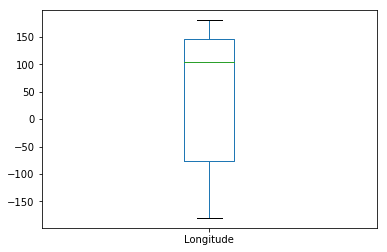

In [16]:
print(df.Longitude.describe())
plot = df.Longitude.plot(kind = 'box')

<p>No bloxplot da Latitude podemos observar uma distribuição quase simétrica, mesmo que a maioria dos abalos sísmicos ocorrendo no hemisferio sul        (mediana = -3.5 graus), podemos dizer que há uma distrubição parecida entre os dois hemisferios.</p>
<p>Já na Longitude notamos que a maioria dos abalos sísmicos ocorrem no oriente (mediana = 103), ou seja, a metade dos tremores acorrem acima dos 103 graus de longitude, no extremo oriente.</p>

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [17]:
dfnovo = df[(df['Type']=='Nuclear Explosion') & (df['Magnitude Type'] == 'MB')]
dfprob = dfnovo.Hemisferio.value_counts(True)
dfprob

norte    0.828221
Sul      0.171779
Name: Hemisferio, dtype: float64

In [36]:
print('P(Norte|MB&NE):{0}\nP(Sul|MB&NE):{1}'.format(dfprob[0],dfprob[1]))

P(Norte|MB&NE):0.8282208588957055
P(Sul|MB&NE):0.17177914110429449


Como P(Norte|MB&NE) > P(Sul|MB&NE), é mais provável que esse certo lugar  esteja no hemisfério Norte